In [1]:
from google.colab import files

uploaded = files.upload()  # select 'seattle_incidents_summer_2014.csv'


Saving seattle_incidents_summer_2014.csv to seattle_incidents_summer_2014.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32779 entries, 0 to 32778
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RMS CDW ID                         32779 non-null  int64  
 1   General Offense Number             32779 non-null  int64  
 2   Offense Code                       32779 non-null  object 
 3   Offense Code Extension             32779 non-null  int64  
 4   Offense Type                       32779 non-null  object 
 5   Summary Offense Code               32779 non-null  object 
 6   Summarized Offense Description     32779 non-null  object 
 7   Date Reported                      32779 non-null  object 
 8   Occurred Date or Date Range Start  32779 non-null  object 
 9   Occurred Date Range End            16499 non-null  object 
 10  Hundred Block Location             32779 non-null  object 
 11  District/Sector                    32722 non-null  obj

/tmp/ipython-input-1834627404.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=night_crimes, palette='viridis')


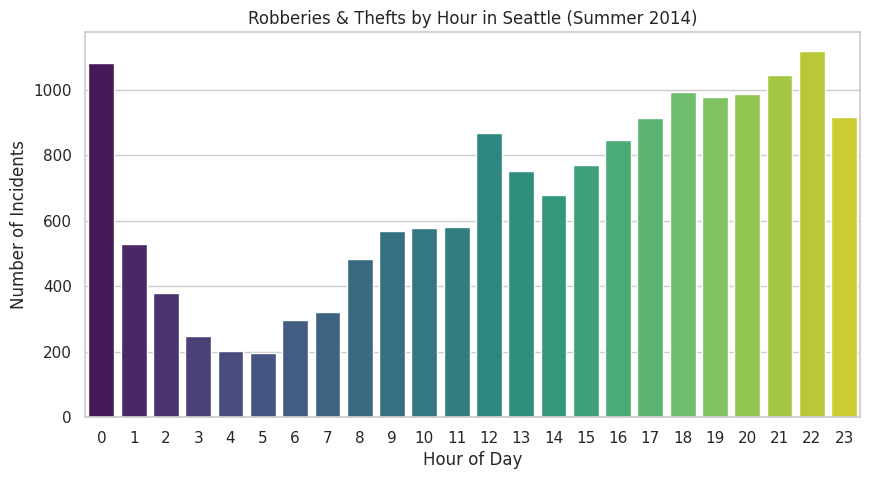

/tmp/ipython-input-1834627404.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.index, y=top_areas.values, palette='magma')


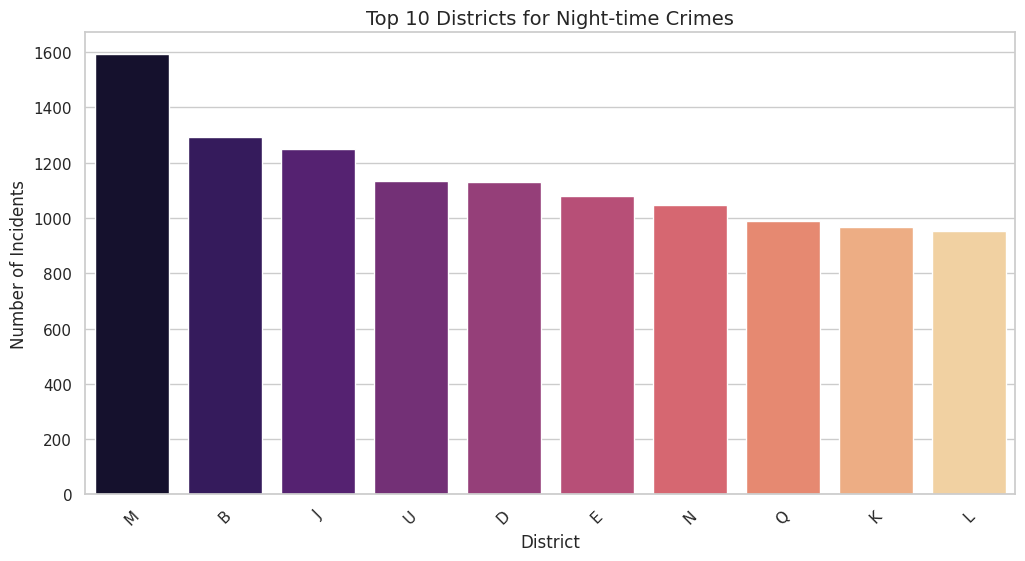

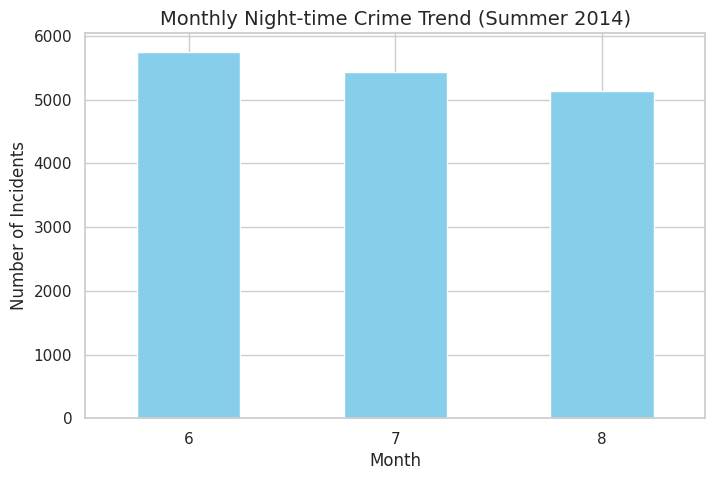

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Load CSV
data = pd.read_csv('seattle_incidents_summer_2014.csv', low_memory=False)

# Quick check
data.head()
data.info()
# Use 'Occurred Date or Date Range Start' column
data['DateTime'] = pd.to_datetime(data['Occurred Date or Date Range Start'], errors='coerce')

# Extract Hour and Month
data['Hour'] = data['DateTime'].dt.hour
data['Month'] = data['DateTime'].dt.month

data[['DateTime', 'Hour', 'Month']].head()
# Use 'Offense Type' for filtering
night_crimes = data[data['Offense Type'].str.contains('ROBBERY|THEFT', case=False, na=False)]

# Quick check
night_crimes['Offense Type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=night_crimes, palette='viridis')
plt.title('Robberies & Thefts by Hour in Seattle (Summer 2014)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0,24))
plt.show()
plt.figure(figsize=(12,6))
top_areas = night_crimes['District/Sector'].value_counts().head(10)
sns.barplot(x=top_areas.index, y=top_areas.values, palette='magma')
plt.title('Top 10 Districts for Night-time Crimes', fontsize=14)
plt.xlabel('District')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()
monthly = night_crimes.groupby('Month').size()
plt.figure(figsize=(8,5))
monthly.plot(kind='bar', color='skyblue')
plt.title('Monthly Night-time Crime Trend (Summer 2014)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()
